In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
df = pd.read_csv('../output/bench.csv')

In [7]:
df.head()

,n,b,y,beta,nu,brute,greedy,dynamic
0,10,1465,12593,0.25,0.25,0.000628,0.000032,0.002436
1,10,1744,19312,0.25,0.50,0.000593,0.000030,0.002783
2,10,1133,42734,0.25,0.75,0.000604,0.000029,0.001717
3,10,1480,46422,0.25,1.00,0.000593,0.000029,0.006225
4,10,2741,12340,0.50,0.25,0.000605,0.000031,0.004931


In [82]:
def spacemap(series):
    return {e: i for i, e in enumerate(sorted(series.unique()))}

columns = ['n', 'b', 'y']
space = [spacemap(df[col]) for col in columns]
shape = [len(dim) for dim in space]
m = np.ndarray(shape)

for _, row in df.iterrows():
    pos = [dim[row[col]] for dim, col in zip(space, columns)]
    m[tuple(pos)] = row['greedy']

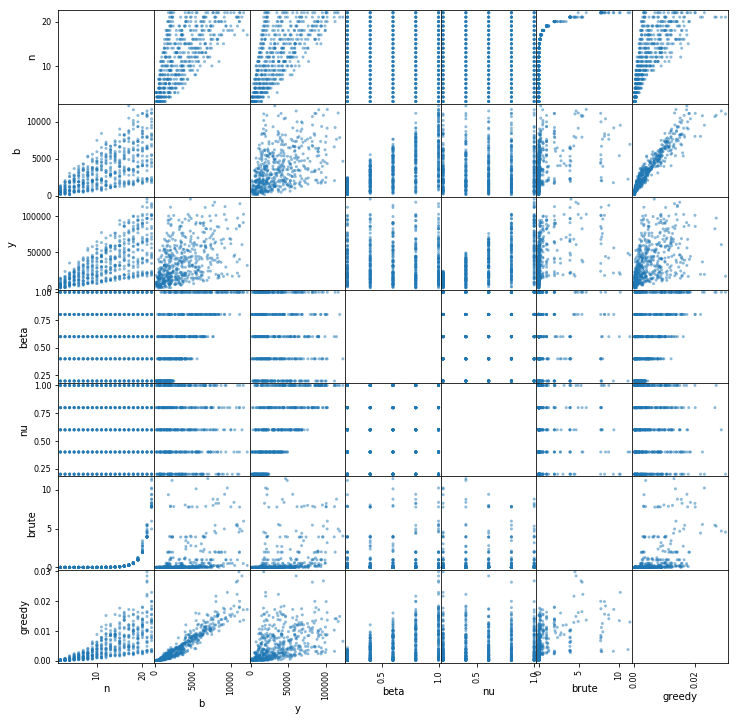

In [16]:
from pandas.plotting import scatter_matrix

df = pd.read_csv('../output/speed.csv')
scatter_matrix(df, figsize=(12, 12), diagonal='none')
plt.show()

/home/max/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=100.0, right=100.0
  'left=%s, right=%s') % (left, right))
/home/max/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=100.0, top=100.0
  'bottom=%s, top=%s') % (bottom, top))
/home/max/.local/lib/python3.6/site-packages/pandas/plotting/_misc.py:123: RuntimeWarning: invalid value encountered in true_divide
  adj = (locs - lim1[0]) / (lim1[1] - lim1[0])


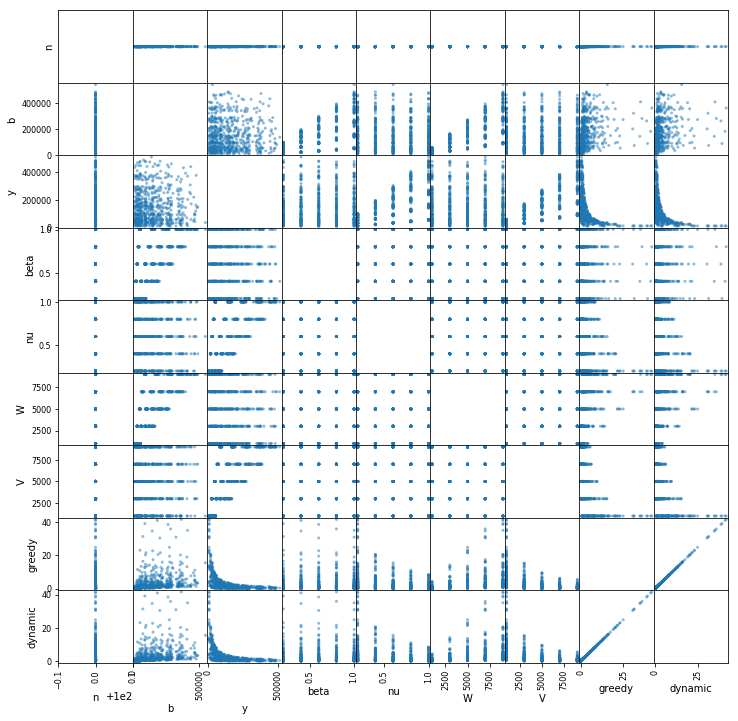

In [25]:
df = pd.read_csv('../output/quality.csv')
scatter_matrix(df, figsize=(12, 12), diagonal='none')
plt.show()